# Uvod v Biopython

[Tomaž Curk](https://github.com/tomazc/ubp), UL FRI, maj 2017

Večina primerov je povzetih iz [tutoriala o Biopythonu](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc288).

Biopython nudi vse glavne funkcije, ki jih potrebuje bioinformatik:

* [Branje in pisanje datotek (FASTA, FASTQ, GENBANK)](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc47)
* [Poravnava zaporedij](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc69)
* [Uporaba programa BLAST](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc87)
* [Dostop do zbirke NCBI](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc111)
* [Dostop do zbirke Swiss-Prot in ExPASy](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc137)
* [Delo s 3D strukturami PDB](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc149)
* [Filogenetika](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc197)
* [Analiza kratkih zaporedij - motivov](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc210)
* [Gručenje](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc230)
* [Nekaj nadzorovanega strojnega učenja](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc240)
* [Izris genomskih diagramov](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc253)
* [Dostop do zbirke KEGG](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc271)

V tej vaji se bomo osredotočili na:

* [Delo z datotekami](#Delo-z-datotekami)
* [Dostop do NCBI](#Dostop-do-NCBI)
* [Izris genomskih diagramov](#Izris genomskih diagramov)
* [Filogenetsko analizo](#Filogenetska-analiza)

Naprej uvozimo modul Biopython.

In [1]:
import Bio

## Delo z datotekami

Razred `SeqIO` omogoča delo z datotekami.

In [2]:
from Bio import SeqIO

Funkcija `SeqIO.parse` poskrbi za pravilno branje zapisov v datotekah. Seveda, če ji namignemo za kateri format gre.

In [3]:
for rec in SeqIO.parse('primer.fasta', 'fasta'):
    print(rec.id)
    print(repr(rec.seq))
    print(len(rec))

FileNotFoundError: [Errno 2] No such file or directory: 'primer.fasta'

Zgornji primer bo vrnil izjemo, ker datoteka `primer.fasta` ne obstaja.

Lahko pa jo naredimo z uporabo funkcije `SeqIO.write`:

In [4]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Alphabet import generic_nucleotide

In [5]:
import random

zap1 = ''.join([random.choice(['A', 'T', 'C', 'G']) for _ in range(40)])
rec1 = SeqRecord(Seq(zap1, generic_nucleotide),
                 id='zap1',
                 description='nakljucno',
                )

zap2 = ''.join([random.choice(['A', 'T', 'C', 'G']) for _ in range(500)])
rec2 = SeqRecord(Seq(zap2, generic_nucleotide),
                 id='zap2',
                 description='tudi nakljucno',
                )

SeqIO.write([rec1, rec2], 'primer.fasta', 'fasta')

2

Zdaj lahko poskusimo prebrati datoteko `primer.fasta`:

In [6]:
for rec in SeqIO.parse('primer.fasta', 'fasta'):
    print(rec.id)
    print(rec.description)
    print(repr(rec.seq))
    print(len(rec))

zap1
zap1 nakljucno
Seq('GCGTTGCAAAGGCGCCGCATCGAGTCAAGCGGGGTGTTAC', SingleLetterAlphabet())
40
zap2
zap2 tudi nakljucno
Seq('CATTCCTTACATACGATATTCATCACTACGGTGGGGAAACTTGTTGGAGTATTG...AGG', SingleLetterAlphabet())
500


Kot smo videli že pri ustvarjanju objektov `SeqRecord`, vsak zapis vsebuje ID, kratek opis (ki vključuje tudi ID) in zaporedje.

Objekti tipa `SeqRecord` se obnašajo podobno kot nizi. Omogočajo indeksiranje, rezanje, itd:

In [7]:
rec

SeqRecord(seq=Seq('CATTCCTTACATACGATATTCATCACTACGGTGGGGAAACTTGTTGGAGTATTG...AGG', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

In [8]:
rec[2]

'T'

In [9]:
rec[2:7]

SeqRecord(seq=Seq('TTCCT', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

In [10]:
rec[2:7].seq

Seq('TTCCT', SingleLetterAlphabet())

In [11]:
str(rec[2:7].seq)

'TTCCT'

In [12]:
rec[2:7] + rec[8:10]

SeqRecord(seq=Seq('TTCCTAC', SingleLetterAlphabet()), id='zap2', name='zap2', description='zap2 tudi nakljucno', dbxrefs=[])

### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo prebrala datoteko in izpisala frekvence posameznih nukleotidov:

In [13]:
cn = {}

for 

G: 137 (25.37%)
C: 137 (25.37%)
T: 122 (22.59%)
A: 144 (26.67%)


### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo za dano zaporedje `s` izrisala frekvenco nukleotidov v oknih dolžine `k`.

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotAT(s, k):
    cns = []
    # dopolni
    return cns

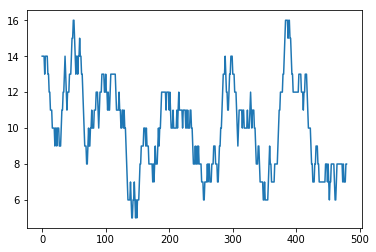

In [15]:
plotAT(rec.seq, 20);

### <font color="green"><b>Vaja</b></font>

Napiši zanko, ki bo za dano zaporedje `s` izrisala frekvenco dinukleotidov CpG v oknih dolžine `k`.

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def plotCG(s, k):
    s = str(s)
    cns = []
    # dopolni
    return cns

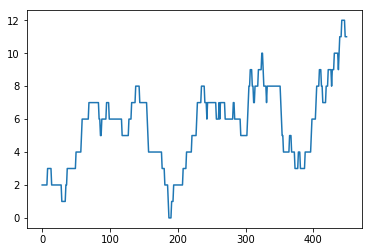

In [17]:
plotCG(rec.seq, 50);

### Branje datotek iz spleta

Seveda Python omogoča branje datotek iz spleta. Preberimo datoteko iz zbirke [ENA](http://www.ebi.ac.uk/ena) na naslovu: [ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz](ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz)

Ker bomo tokrat brali datoteko FASTQ, moramo to eksplicitno navesti funkciji `SeqIO.parse`:

In [18]:
import urllib
import gzip

f = gzip.open(urllib.request.urlopen('ftp://ftp.sra.ebi.ac.uk/vol1/fastq/SRR020/SRR020192/SRR020192.fastq.gz'), 'rt')

for rec in list(SeqIO.parse(f, 'fastq'))[:3]:
    print(rec.id)
    print(repr(rec.seq))
    print(rec.letter_annotations["phred_quality"])
    print(len(rec))

SRR020192.1
Seq('GATGACGGTGTCTACATTGTTCCCGACCACTCATCTCCTCTGTCATGCCCGAAA...CGT', SingleLetterAlphabet())
[24, 23, 27, 30, 30, 30, 23, 23, 24, 23, 23, 30, 28, 27, 25, 25, 27, 27, 27, 22, 22, 24, 18, 18, 18, 30, 19, 19, 23, 23, 30, 30, 32, 32, 32, 30, 24, 23, 23, 27, 30, 32, 30, 32, 29, 28, 28, 17, 17, 17, 17, 24, 17, 17, 13, 15, 17, 25, 25, 24, 24, 23, 27, 27, 15, 15, 15, 15, 15, 17, 17, 11, 15, 15]
74
SRR020192.2
Seq('GATGACGGTGTCTACATCGTTCCACCACTCATCTCCTCTGTCATGCCCGAAAGT...CCC', SingleLetterAlphabet())
[27, 27, 27, 30, 30, 30, 23, 23, 24, 27, 27, 30, 28, 27, 27, 27, 27, 30, 30, 27, 27, 27, 27, 30, 23, 23, 23, 23, 30, 30, 32, 32, 30, 30, 27, 27, 27, 27, 30, 29, 28, 29, 29, 29, 29, 17, 15, 15, 15, 15, 15, 15, 15, 17, 26, 15, 15, 15, 15, 27, 27, 15, 15, 15, 15, 15]
66
SRR020192.3
Seq('GACGACGGTGTCTACATCGTTCCACCACTCATCTCCTCTGTCATGCCCAAAGTC...CGT', SingleLetterAlphabet())
[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,

V zgornjem primeru opazite, da se poleg zaporedja zdaj izpisuje podatek o kvaliteti sekvenciranja posameznega nukleotida, t.i. ocena [PHRED](https://en.wikipedia.org/wiki/Phred_quality_score), ki je sestavni del formata [FASTQ](https://en.wikipedia.org/wiki/FASTQ_format).

### <font color="green"><b>Vaja</b></font>

Napiši funkcijo `trim_low_quality_tail(rec, phred_th)`, ki na koncu zaporedja `rec` zbriše vse poziciji z nizko kvaliteto (pod pragom `phred_th`).

In [19]:
def trim_low_quality_tail(rec, phred_th):
    # dopolni
    return rec

In [20]:
len(rec)

111

In [21]:
trimmed = trim_low_quality_tail(rec, 25)

In [22]:
len(trimmed)

85

## Dostop do NCBI

Zbirka [NCBI](https://www.ncbi.nlm.nih.gov) obsega raznolike baze, vključno z genomi v obliki [GENBANK](https://www.ncbi.nlm.nih.gov/Sitemap/samplerecord.html). V Biopythonu dostopamo do zbirke z uporabo modula `Entrez`.

In [23]:
from Bio import Entrez
Entrez.email = 'moj.mail@naslovu.si'

Naložimo zapis človeškega mitohondrija, recimo [NC_012920.1](https://www.ncbi.nlm.nih.gov/nuccore/NC_012920.1).

"gb" je okrajšava za "genbank".

In [24]:
handle = Entrez.efetch(db='nucleotide', rettype='gb', id='NC_012920.1')

rec = SeqIO.read(handle, "gb")

### <font color="green"><b>Vaja</b></font>

Uporabite funkciji `plotAT` in `plotCG` in izrišite mitohondrijski genom.

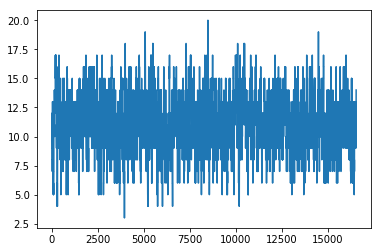

In [25]:
plotAT(rec.seq, 20);

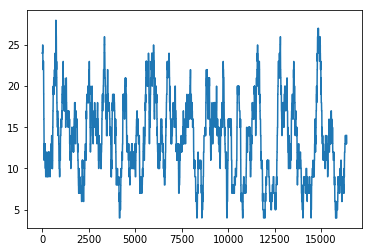

In [26]:
plotCG(rec.seq, 200);

Zapisi genbank vsebujejo tudi podatke o genskih modelih:

In [27]:
for feature in rec.features:
    print(feature)

type: source
location: [0:16569](+)
qualifiers:
    Key: country, Value: ['United Kingdom: Great Britain']
    Key: db_xref, Value: ['taxon:9606']
    Key: isolation_source, Value: ['caucasian']
    Key: mol_type, Value: ['genomic DNA']
    Key: note, Value: ['this is the rCRS']
    Key: organelle, Value: ['mitochondrion']
    Key: organism, Value: ['Homo sapiens']
    Key: tissue_type, Value: ['placenta']

type: D-loop
location: join{[0:576](-), [16023:16569](-)}
qualifiers:

type: gene
location: [576:647](+)
qualifiers:
    Key: db_xref, Value: ['GeneID:4558', 'HGNC:HGNC:7481', 'MIM:590070']
    Key: gene, Value: ['TRNF']
    Key: nomenclature, Value: ['Official Symbol: MT-TF | Name: mitochondrially encoded tRNA phenylalanine | Provided by: HGNC:HGNC:7481']

type: tRNA
location: [576:647](+)
qualifiers:
    Key: anticodon, Value: ['(pos:611..613,aa:Phe,seq:gaa)']
    Key: codon_recognized, Value: ['UUC']
    Key: db_xref, Value: ['GeneID:4558', 'HGNC:HGNC:7481', 'MIM:590070']
    Key

In [28]:
for feature in rec.features:
    print(feature.type)
    print(feature.location)
    print()

source
[0:16569](+)

D-loop
join{[0:576](-), [16023:16569](-)}

gene
[576:647](+)

tRNA
[576:647](+)

gene
[647:1601](+)

rRNA
[647:1601](+)

STS
[1477:2187](+)

gene
[1601:1670](+)

tRNA
[1601:1670](+)

gene
[1670:3229](+)

rRNA
[1670:3229](+)

STS
[2061:2203](+)

STS
[2711:2884](+)

STS
[2805:2946](+)

misc_feature
[3106:3107](+)

gene
[3229:3304](+)

tRNA
[3229:3304](+)

gene
[3306:4262](+)

CDS
[3306:4262](+)

STS
[3739:3834](+)

STS
[4188:4813](+)

gene
[4262:4331](+)

tRNA
[4262:4331](+)

gene
[4328:4400](-)

tRNA
[4328:4400](-)

gene
[4401:4469](+)

tRNA
[4401:4469](+)

gene
[4469:5511](+)

CDS
[4469:5511](+)

STS
[4480:5456](+)

gene
[5511:5579](+)

tRNA
[5511:5579](+)

gene
[5586:5655](-)

tRNA
[5586:5655](-)

gene
[5656:5729](-)

tRNA
[5656:5729](-)

gene
[5760:5826](-)

tRNA
[5760:5826](-)

gene
[5825:5891](-)

tRNA
[5825:5891](-)

gene
[5903:7445](+)

CDS
[5903:7445](+)

STS
[6317:6918](+)

STS
[7124:7672](+)

STS
[7165:7361](+)

STS
[7357:7937](+)

STS
[7385:7513](+)

gene

Za filogenetske primerjave je zanimiva t.i. regija [HVR oz. D-loop](https://en.wikipedia.org/wiki/Hypervariable_region).

### <font color="green"><b>Vaja</b></font>

Napišite funkcijo `get_Dloop(rec)`, ki bo za dani zapis oblike `genbank` vrnila zaporedje področja HVR. V primeru več takih regij vrnite prvo.

In [29]:
def get_Dloop(rec):
    # dopolni
    return dloops[0]

In [30]:
hvr = get_Dloop(rec)
print(len(hvr))

1122


Zdaj, ko imamo zapis te regije, lahko pridobimo zaporedje:

In [31]:
hvr_seq = hvr.extract(rec)

In [32]:
len(hvr_seq)

1122

Regija je v tem primeru dolga 1122 baz.

### <font color="green"><b>Vaja</b></font>

Napišite funkcijo `codon_frequency(rec)`, ki za kodirajoče gene v danem zapisu `rec` oblike `genbank` vrne frekvenco kodonov. <b>Namig:</b> glej zapise tipa `CDS`.

In [33]:
def codon_frequency(rec):
    ret_d = {}
    # dopolni
    return ret_d            

In [34]:
codon_frequency(rec)

{'AAA': 85,
 'AAC': 132,
 'AAG': 10,
 'AAT': 32,
 'ACA': 134,
 'ACC': 155,
 'ACG': 10,
 'ACT': 52,
 'AGC': 39,
 'AGT': 14,
 'ATA': 167,
 'ATC': 196,
 'ATG': 40,
 'ATT': 124,
 'CAA': 82,
 'CAC': 79,
 'CAG': 8,
 'CAT': 18,
 'CCA': 52,
 'CCC': 119,
 'CCG': 7,
 'CCT': 41,
 'CGA': 28,
 'CGC': 26,
 'CGG': 2,
 'CGT': 7,
 'CTA': 276,
 'CTC': 167,
 'CTG': 45,
 'CTT': 65,
 'GAA': 64,
 'GAC': 51,
 'GAG': 24,
 'GAT': 15,
 'GCA': 80,
 'GCC': 124,
 'GCG': 8,
 'GCT': 43,
 'GGA': 67,
 'GGC': 87,
 'GGG': 34,
 'GGT': 24,
 'GTA': 70,
 'GTC': 48,
 'GTG': 18,
 'GTT': 31,
 'TAC': 89,
 'TAT': 46,
 'TCA': 83,
 'TCC': 99,
 'TCG': 7,
 'TCT': 32,
 'TGA': 93,
 'TGC': 17,
 'TGG': 11,
 'TGT': 5,
 'TTA': 73,
 'TTC': 139,
 'TTG': 18,
 'TTT': 77}

## Izris genomskih diagramov

Preden nadaljujemo s filogenetsko analizo, poskusimo prikazati mitohondrijski genom na malce lepši način.

In [35]:
from reportlab.lib import colors
from reportlab.lib.units import cm
from Bio.Graphics import GenomeDiagram

In [36]:
gd_diagram = GenomeDiagram.Diagram('Mitohondrijski genom')
gd_track_for_features = gd_diagram.new_track(1, name='geni')
gd_feature_set = gd_track_for_features.new_set()

In [37]:
for feature in rec.features:
    if feature.type != "gene" and feature.type != 'D-loop':
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True, sigil="ARROW", 
                               arrowshaft_height=1.0, arrowhead_length=0.25,
                               label_size=10, label_angle=40,
                              )

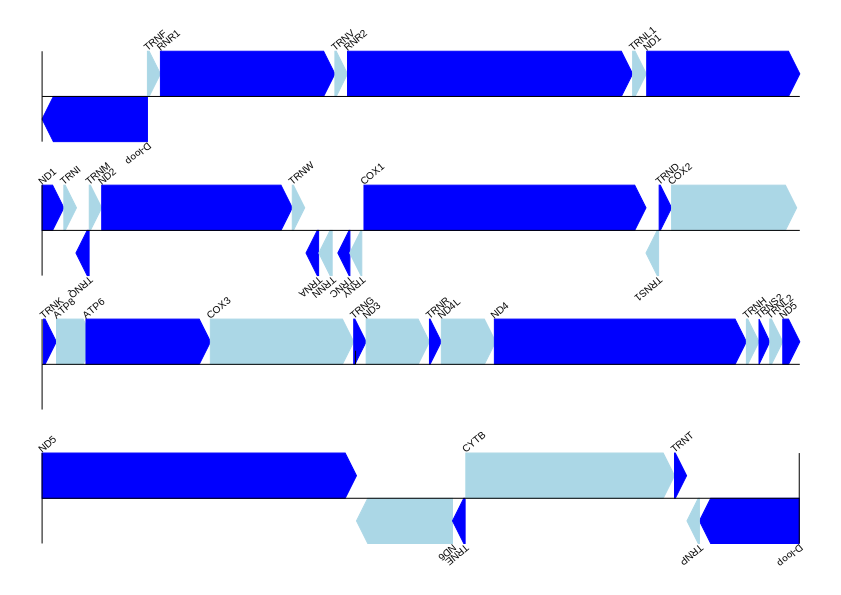

In [38]:
gd_diagram.draw(format="linear", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec))
gd_diagram.write("mt_lin.svg", "SVG")
from IPython.display import SVG
SVG("mt_lin.svg")

Morda krožni diagram:

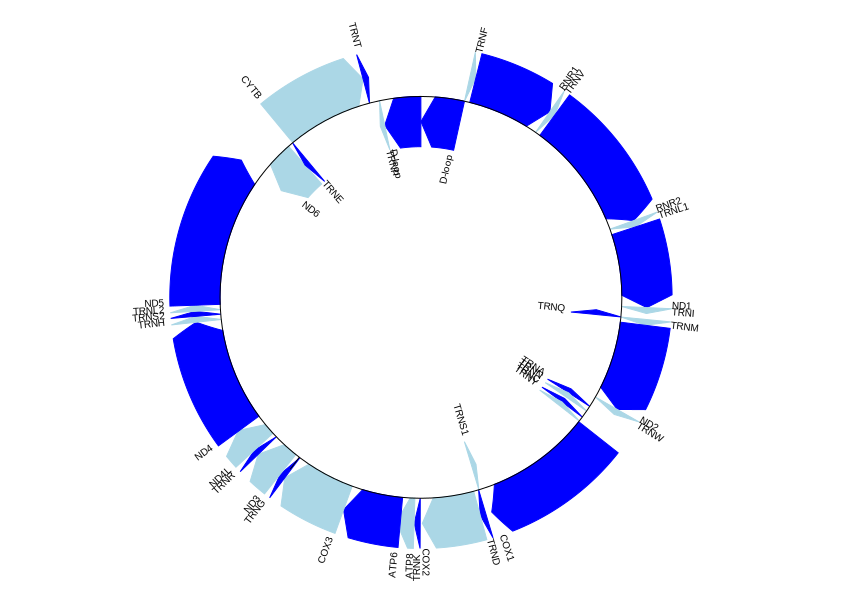

In [39]:
gd_diagram.draw(format="circular", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec), circle_core = 0.5)
gd_diagram.write("mt_lin.svg", "SVG")
from IPython.display import SVG
SVG("mt_lin.svg")

## Filogenetska analiza


### <font color="green"><b>Vaja</b></font>

Preden začnemo s filogenetsko analizo, poskusite pridobiti še neandertalov mitohondrijski genom. Recimo, zaporedje [NC_011137.1](https://www.ncbi.nlm.nih.gov/nuccore/NC_011137.1).

In [40]:
handle = Entrez.efetch( # dopolni

In [41]:
gd_diagram = GenomeDiagram.Diagram('Mitohondrijski genom neandertalca')
gd_track_for_features = gd_diagram.new_track(1, name='geni')
gd_feature_set = gd_track_for_features.new_set()

for feature in rec_n.features:
    if feature.type != "gene" and feature.type != 'D-loop':
        #Exclude this feature
        continue
    if len(gd_feature_set) % 2 == 0:
        color = colors.blue
    else:
        color = colors.lightblue
    gd_feature_set.add_feature(feature, color=color, label=True, sigil="ARROW", 
                               arrowshaft_height=1.0, arrowhead_length=0.25,
                               label_size=10, label_angle=40,
                              )

gd_diagram.draw(format="circular", orientation="landscape", pagesize='A4',
                fragments=4, start=0, end=len(rec_n), circle_core = 0.5)
gd_diagram.write("mt_lin_n.svg", "SVG")

Prikažimo oba genoma, človeškega in neandertalskega:

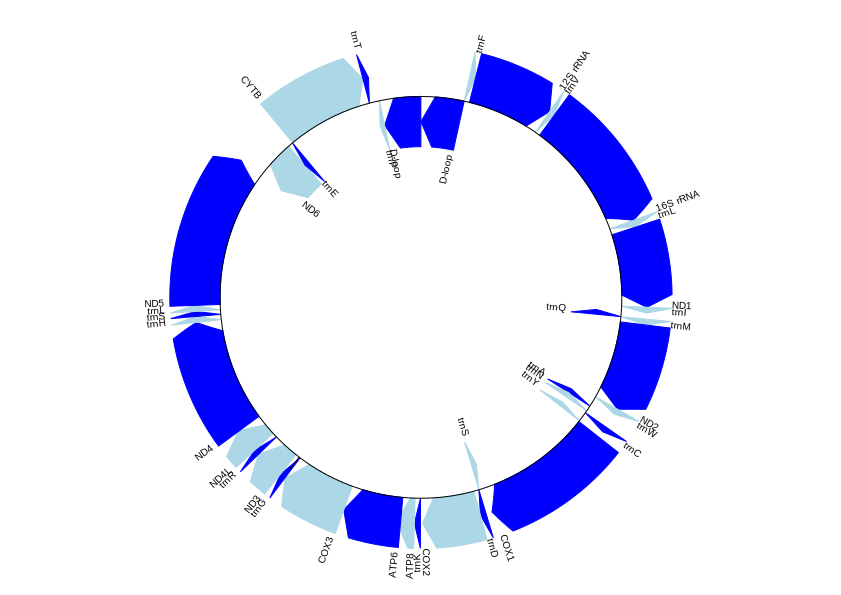

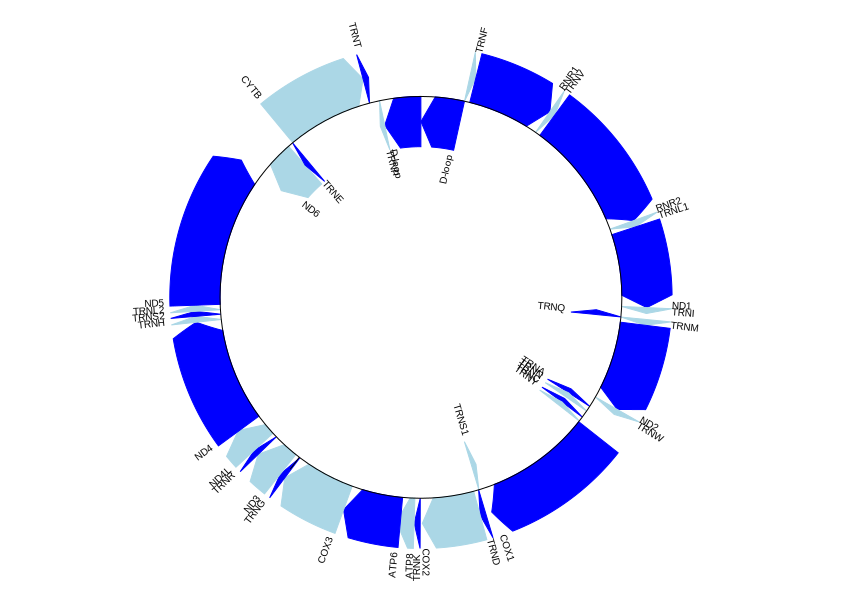

In [42]:
from IPython.display import display, SVG
display(SVG("mt_lin_n.svg"), SVG("mt_lin.svg"))

### <font color="green"><b>Vaja</b></font>
Kako podobni sta regiji `HVR`?

In [43]:
hvr_n_seq = # dopolni

In [44]:
len(hvr_seq), len(hvr_n_seq)

(1122, 1119)

In [45]:
# dopolni

0

Praktično identično. Smo ljudje torej enaki neandertalcem?

### <font color="green"><b>Vaja</b></font>

Izračunaj podobnost celotnega mitohondrijskega genoma?

In [46]:
# dopolni

(16569, 16565)

In [47]:
# dopolni

4852

Uff, še dobro! Očitno si pa le nismo tako podobni.

## Poizvedbe baze NCBI

Poiščimo še nekaj človeških mitohondrijskih genomov. Če želimo to storiti na [spletni strani NCBI](https://www.ncbi.nlm.nih.gov/nuccore), je potrebno zapisati v iskalno polje: [`"Homo sapiens"[Organism] AND mitochondrion[filter] AND complete_genome[All Fields]`](https://www.ncbi.nlm.nih.gov/nuccore?term=%22Homo%20sapiens%22%5BOrganism%5D%20AND%20mitochondrion%5Bfilter%5D%20AND%20complete_genome&cmd=DetailsSearch)


In [48]:
term = '"Homo sapiens"[Organism] AND mitochondrion[filter] AND complete_genome[All Fields]'
handle = Entrez.esearch(db="nucleotide", term=term, retmax=100000)
record = Entrez.read(handle)
id_list = sorted(set(record["IdList"]))
record["Count"], len(id_list)

('37243', 37243)

Zapisov popolnih mitohondrijskih genomov v NCBI je preko 30000!

### <font color="green"><b>Vaja</b></font>

Pridobite prvi 30 zapisov in preverite njihove dolžine.

In [49]:
seqs = []
for rid in id_list[:30]:
    print(rid)
    # dopolni

1001886902
1001887034
1001887157
1001887276
1001887412
1001887523
1002819669
1002819697
1002819711
1002819725
1002819739
1002819753
1002819767
1002819781
1002819795
1002819809
1002819823
1002819837
1002819851
1002819865
1002819879
1002819893
1002819907
1002819921
1002819935
1002819949
1002819963
1002819977
1002819991
1002820005


In [50]:
[len(x) for x in seqs]

[16571,
 16570,
 16570,
 16568,
 16569,
 16569,
 16567,
 16569,
 16568,
 16567,
 16567,
 16566,
 16568,
 16570,
 16567,
 16567,
 16559,
 16563,
 16561,
 16554,
 16559,
 16560,
 16560,
 16561,
 16562,
 16558,
 16562,
 16561,
 16562,
 16564]

Dolžine genomov se med posamezniki razlikujejo. Kaj pa dolžine regij HVR.

In [51]:
for seq in seqs:
    print(len(get_Dloop(seq).extract(seq)))

657
657
657
657
657
657
1121
1123
1122
1121
1121
1120
1122
1124
1121
1121
1122
1126
1124
1117
1122
1123
1123
1124
1125
1121
1125
1124
1125
1127


Ker se zaporedja med seboj očitno razlikujejo po dolžini, bi jih morali najprej poravnati.
Ker pa to presega današnjo vajo, se osredotočimo le na sekvence dolžine 1121.

In [52]:
seqs_1121 = [get_Dloop(seq).extract(seq) for seq in seqs if len(get_Dloop(seq)) == 1121]
len(seqs_1121)

6

### <font color="green"><b>Vaja</b></font>

Preverite variabilnost posameznih mest.

In [53]:
v = []
for i in range(len(seqs_1121[0])):
    tmpd = {}
    # dopolni

In [54]:
[(i, d) for i, d in enumerate(v) if len(d) > 1]

[(61, {'C': 5, 'T': 1}),
 (62, {'G': 1, 'T': 5}),
 (63, {'C': 1, 'G': 5}),
 (64, {'G': 5, 'T': 1}),
 (66, {'G': 1, 'T': 5}),
 (67, {'A': 5, 'G': 1}),
 (68, {'G': 5, 'T': 1}),
 (69, {'A': 1, 'G': 5}),
 (70, {'A': 5, 'G': 1}),
 (71, {'G': 1, 'T': 5}),
 (72, {'A': 1, 'G': 5}),
 (73, {'G': 5, 'T': 1}),
 (75, {'C': 5, 'G': 1}),
 (77, {'G': 5, 'T': 1}),
 (81, {'G': 1, 'T': 5}),
 (82, {'G': 1, 'T': 5}),
 (83, {'G': 5, 'T': 1}),
 (85, {'A': 5, 'G': 1}),
 (87, {'A': 1, 'T': 5}),
 (88, {'G': 5, 'T': 1}),
 (89, {'A': 5, 'T': 1}),
 (90, {'G': 1, 'T': 5}),
 (91, {'A': 1, 'G': 5}),
 (92, {'A': 5, 'T': 1}),
 (95, {'G': 1, 'T': 5}),
 (96, {'A': 1, 'T': 5}),
 (97, {'A': 5, 'T': 1}),
 (98, {'G': 5, 'T': 1}),
 (99, {'A': 1, 'T': 5}),
 (100, {'A': 5, 'G': 1}),
 (101, {'G': 5, 'T': 1}),
 (102, {'A': 1, 'T': 5}),
 (103, {'A': 5, 'G': 1}),
 (105, {'A': 1, 'G': 5}),
 (106, {'G': 5, 'T': 1}),
 (108, {'A': 5, 'G': 1}),
 (110, {'A': 1, 'T': 5}),
 (112, {'G': 5, 'T': 1}),
 (114, {'A': 5, 'G': 1}),
 (116, {'A': 1,